In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Upload the housing.csv file to your drive under the same folder as your Colab Notebooks
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
df = df.drop('Address', axis = 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [18]:
X_feature = df.drop("Price", axis = 1) # Input matrix
y_target = df['Price'] # target/output vector

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

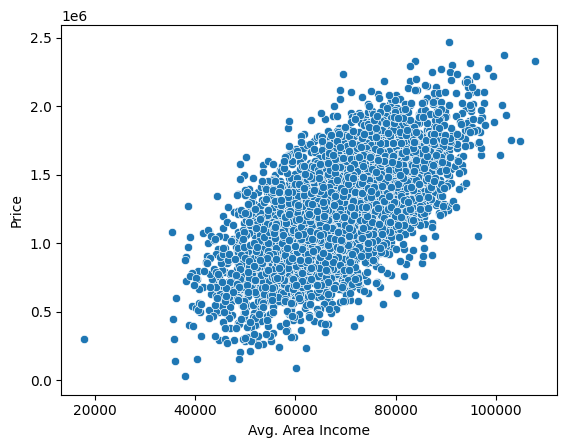

In [22]:
sns.scatterplot(data = X_feature, x = 'Avg. Area Income' , y = y_target)

In [20]:
X_feature.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

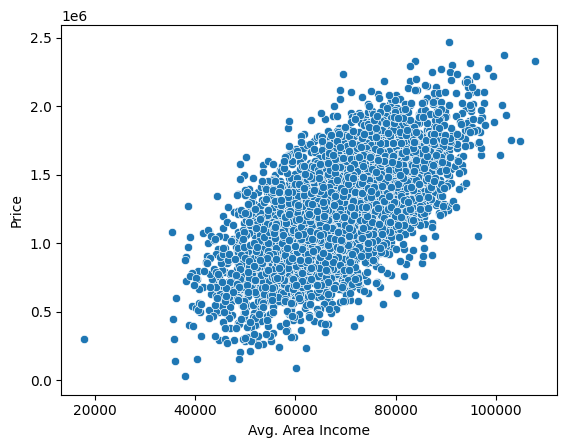

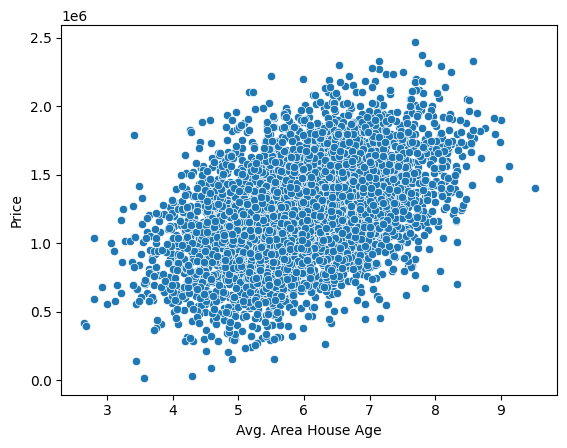

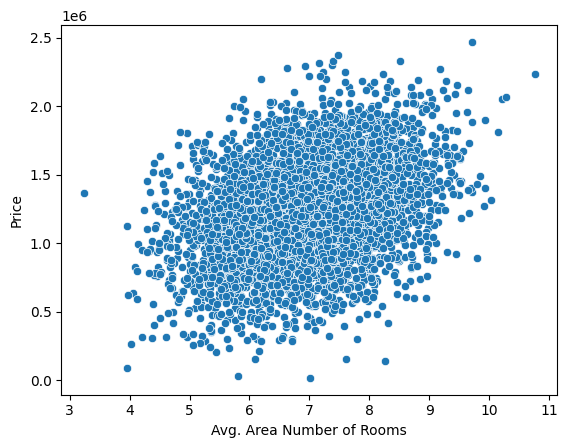

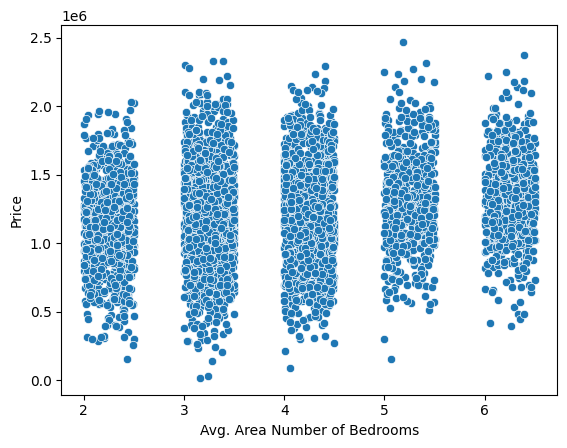

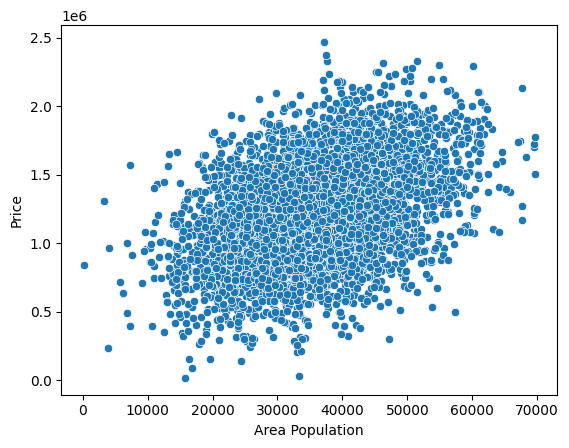

In [26]:
for col in X_feature.columns:
  sns.scatterplot(data = X_feature, x = col, y = y_target)
  plt.show()

<Axes: >

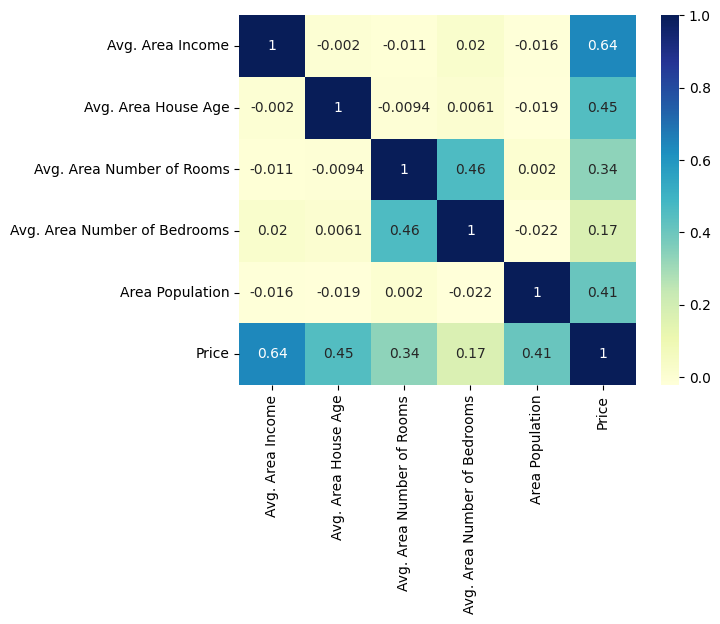

In [27]:
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

In [28]:
X_feature = X_feature.drop('Avg. Area Number of Bedrooms', axis = 1)
X_feature

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947
...,...,...,...,...
4995,60567.94414,7.830362,6.137356,22837.36103
4996,78491.27543,6.999135,6.576763,25616.11549
4997,63390.68689,7.250591,4.805081,33266.14549
4998,68001.33124,5.534388,7.130144,42625.62016


In [30]:
from sklearn.linear_model import LinearRegression

# Create empty linear regression model
reg_model = LinearRegression()

reg_model.fit(X_feature, y_target)

# Extracting constants
print('Intercept: ', reg_model.intercept_)
print('Coefficients: ', reg_model.coef_)

Intercept:  -2637560.6725508487
Coefficients:  [2.15827436e+01 1.65657872e+05 1.21598165e+05 1.51961198e+01]


In [31]:
# y     = b0 + b1x1                  + b2x2                     + b3x3                           + b4x4
# Price = b0 + b1 'Avg. Area Income' + b2 'Avg. Area House Age' + b3 'Avg. Area Number of Rooms' + b4 'Area Population'

# Price = -2637560.6725508487 + 2.15827436e+01 'Avg. Area Income' + 1.65657872e+05 'Avg. Area House Age' + 1.21598165e+05 'Avg. Area Number of Rooms' + 1.51961198e+01 'Area Population'

X_feature.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [32]:
# Price = -2637560.6725508487 + 2.15827436e+01 'Avg. Area Income' + 1.65657872e+05 'Avg. Area House Age' + 1.21598165e+05 'Avg. Area Number of Rooms' + 1.51961198e+01 'Area Population'
# Price = -2637560.6725508487 + 21.5827436 (100000) + 165657.872 (40) + 121598.165 (3) + 15.1961198(50000)
# Price = 7271629.0524486555

# Increase Avg area income by 1 unit
# Price = -2637560.6725508487 + 21.5827436 (100001) + 165657.872 (40) + 121598.165 (3) + 15.1961198(50000)
# Price = 7271650.635192753

difference = 7271650.635192753 - 7271629.0524486555
difference


21.582744097337127